<a href="https://colab.research.google.com/github/josefstrnad/02_Spaceship_Titanic_Final/blob/main/Spaceship_Titanic_Final_GIT_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

In [ ]:
'''
Dataset Description
In this competition, the goal is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with a spacetime anomaly.
Personal records recovered from the damaged computer system of the ship are provided to aid in making these predictions.

Data Field Descriptions
PassengerId: Unique ID for each passenger, formatted as gggg_pp, indicating a travel group.
HomePlanet: The planet the passenger departed from, usually their permanent residence.
CryoSleep: Indicates if the passenger chose suspended animation during the voyage.
Cabin: The cabin number in the format deck/num/side (P for Port, S for Starboard).
Destination: The planet the passenger will disembark to.
Age: The passenger's age.
VIP: Whether the passenger paid for VIP service.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: Amount billed for spaceship amenities.
Name: First and last names of the passenger.
Transported: Target variable indicating if the passenger was transported to another dimension.

Train: All except PassengerId, Name, Transported

Target: Transported
'''

# 1. Importing Modules (Libraries) and loading data

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Paired')
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [68]:
!git clone https://github.com/josefstrnad/02_Spaceship_Titanic_Final

fatal: destination path '02_Spaceship_Titanic_Final' already exists and is not an empty directory.


In [69]:
train_data = pd.read_csv(f"/content/02_Spaceship_Titanic_Final/train.csv")
test_data = pd.read_csv(f"/content/02_Spaceship_Titanic_Final/test.csv")
sub_df = pd.read_csv(f"/content/02_Spaceship_Titanic_Final/sample_submission.csv")
df = pd.concat([train_data, test_data])

In [70]:
train_data.shape

(8693, 14)

In [71]:
test_data.shape

(4277, 13)

In [72]:
df.shape

(12970, 14)

In [73]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [74]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [76]:
df.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [77]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


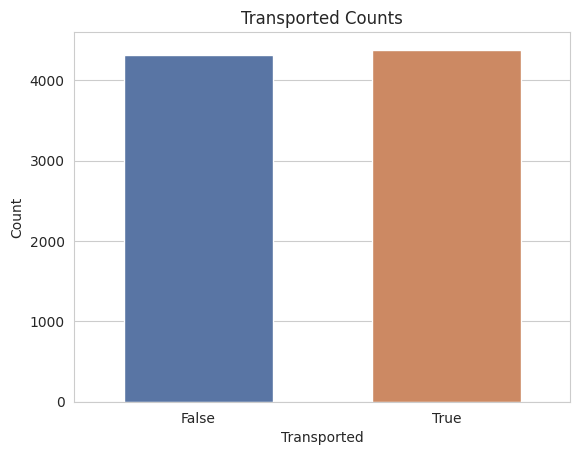

In [78]:
# Check if the target is balanced: According to graph - yes
sns.countplot(x='Transported', data=df, width=0.6, palette='deep')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.title('Transported Counts')
plt.show()

# Data Pre-processing

In [79]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [80]:
df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [81]:
df.shape

(12970, 14)

In [82]:
# Extract information from the Cabin column
df['CabinDeck'] = df['Cabin'].str.extract(r'([A-Za-z]+)')
df['CabinNo'] = df['Cabin'].str.extract(r'(\d+)')
df['CabinSide'] = df['Cabin'].str.extract(r'([PS])')

df['CabinNo'] = pd.to_numeric(df['CabinNo'], errors='coerce')

df.drop(['Cabin'], axis=1, inplace=True)

In [83]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNo,CabinSide
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S
5,0005_01,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0.0,P
6,0006_01,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,2.0,S
7,0006_02,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,0.0,S
8,0007_01,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,F,3.0,S
9,0008_01,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1.0,P


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Name          12676 non-null  object 
 12  Transported   8693 non-null   object 
 13  CabinDeck     12671 non-null  object 
 14  CabinNo       12671 non-null  float64
 15  CabinSide     12671 non-null  object 
dtypes: float64(7), object(9)
memory usage: 1.7+ MB


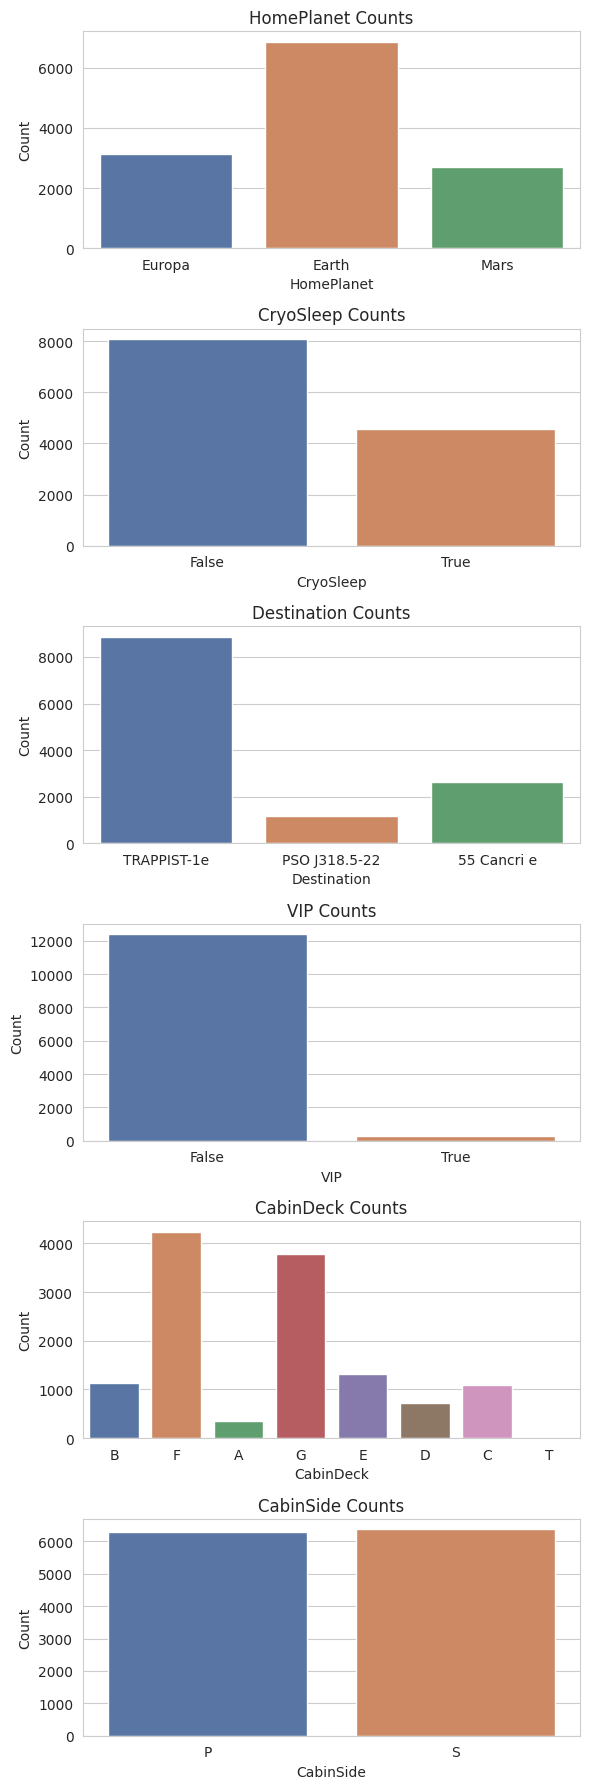

In [85]:
columns_to_plot = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(6, 3 * len(columns_to_plot)))

# Create count plots for each column
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=df, palette='deep', ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{column} Counts')

plt.tight_layout()
plt.show()

In [86]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNo
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000,12671.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482,603.601926
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223,512.891926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,170.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000,1008.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000


In [87]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNo,CabinSide
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S


In [88]:
df=df.replace(to_replace=False,value=0)
df=df.replace(to_replace=True,value=1)

In [89]:
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNo']
nominal_cols = ['HomePlanet', 'CabinSide', 'Destination', 'CryoSleep']
ordinal_cols = ['VIP', 'CabinDeck']

In [90]:
def clean(df):
    # Drop specified columns
    df = df.drop(['PassengerId', 'Name'], axis=1)

    # Identify numerical and categorical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    # Impute missing values in numerical columns with mean
    for col in num_cols:
        df[col] = df[col].fillna(df[col].mean())

    # Impute missing values in categorical columns with mode
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Display the resulting DataFrame and column lists
    return df, num_cols, cat_cols


# Apply the clean function
df_cleaned, num_cols, cat_cols = clean(df)

df_cleaned

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNo,CabinSide
0,Europa,0.0,TRAPPIST-1e,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,B,0.000000,P
1,Earth,0.0,TRAPPIST-1e,24.000000,0.0,109.0,9.0,25.0,549.0,44.0,1.000000,F,0.000000,S
2,Europa,0.0,TRAPPIST-1e,58.000000,1.0,43.0,3576.0,0.0,6715.0,49.0,0.000000,A,0.000000,S
3,Europa,0.0,TRAPPIST-1e,33.000000,0.0,0.0,1283.0,371.0,3329.0,193.0,0.000000,A,0.000000,S
4,Earth,0.0,TRAPPIST-1e,16.000000,0.0,303.0,70.0,151.0,565.0,2.0,1.000000,F,1.000000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,1.0,TRAPPIST-1e,34.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.503624,G,1496.000000,S
4273,Earth,0.0,TRAPPIST-1e,42.000000,0.0,0.0,847.0,17.0,10.0,144.0,0.503624,F,603.601926,S
4274,Mars,1.0,55 Cancri e,28.771969,0.0,0.0,0.0,0.0,0.0,0.0,0.503624,D,296.000000,P
4275,Europa,0.0,TRAPPIST-1e,28.771969,0.0,0.0,2680.0,0.0,0.0,523.0,0.503624,D,297.000000,P


In [91]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  float64
 2   Destination   12970 non-null  object 
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  float64
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  Transported   12970 non-null  float64
 11  CabinDeck     12970 non-null  object 
 12  CabinNo       12970 non-null  float64
 13  CabinSide     12970 non-null  object 
dtypes: float64(10), object(4)
memory usage: 1.5+ MB


In [92]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNo,CabinSide
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,B,0.0,P
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,F,0.0,S
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,A,0.0,S
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,A,0.0,S
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,F,1.0,S


In [93]:
label_encoder = LabelEncoder()
for col in ordinal_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])


# Display the resulting DataFrame
df_cleaned.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNo,CabinSide
0,Europa,0.0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,P
1,Earth,0.0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1.0,5,0.0,S
2,Europa,0.0,TRAPPIST-1e,58.0,2,43.0,3576.0,0.0,6715.0,49.0,0.0,0,0.0,S
3,Europa,0.0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,0.0,S
4,Earth,0.0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,5,1.0,S


In [94]:
df_cleaned['Transported'] = df_cleaned['Transported'].astype(int)

In [95]:
df_cleaned.shape

(12970, 14)

In [96]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  float64
 2   Destination   12970 non-null  object 
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  int64  
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  Transported   12970 non-null  int64  
 11  CabinDeck     12970 non-null  int64  
 12  CabinNo       12970 non-null  float64
 13  CabinSide     12970 non-null  object 
dtypes: float64(8), int64(3), object(3)
memory usage: 1.5+ MB


In [97]:
# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid the dummy variable trap

# Fit and transform on df
encoded_nominal_df = pd.DataFrame(onehot_encoder.fit_transform(df_cleaned[nominal_cols].values), columns=onehot_encoder.get_feature_names_out(nominal_cols))

# Display the encoded df
encoded_nominal_df.head()

,HomePlanet_Europa,HomePlanet_Mars,CabinSide_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_0.3618483412322275,CryoSleep_1.0
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [98]:
encoded_nominal_df.shape

(12970, 7)

In [99]:
encoded_nominal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   HomePlanet_Europa             12970 non-null  float64
 1   HomePlanet_Mars               12970 non-null  float64
 2   CabinSide_S                   12970 non-null  float64
 3   Destination_PSO J318.5-22     12970 non-null  float64
 4   Destination_TRAPPIST-1e       12970 non-null  float64
 5   CryoSleep_0.3618483412322275  12970 non-null  float64
 6   CryoSleep_1.0                 12970 non-null  float64
dtypes: float64(7)
memory usage: 709.4 KB


In [100]:
df_model = pd.concat([df_cleaned.reset_index(drop=True), encoded_nominal_df.reset_index(drop=True)], axis=1)
df_model = df_model.drop(nominal_cols, axis=1)

In [101]:
df_model.head(10)

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNo,HomePlanet_Europa,HomePlanet_Mars,CabinSide_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_0.3618483412322275,CryoSleep_1.0
0,39.0,0,0.0,0.0,0.0,0.0,0.000000,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,24.0,0,109.0,9.0,25.0,549.0,44.000000,1,5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,58.0,2,43.0,3576.0,0.0,6715.0,49.000000,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,33.0,0,0.0,1283.0,371.0,3329.0,193.000000,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,16.0,0,303.0,70.0,151.0,565.0,2.000000,1,5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,44.0,0,0.0,483.0,0.0,291.0,0.000000,1,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,26.0,0,42.0,1539.0,3.0,0.0,0.000000,1,5,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,28.0,0,0.0,0.0,0.0,0.0,306.789482,1,6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8,35.0,0,0.0,785.0,17.0,216.0,0.000000,1,5,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,14.0,0,0.0,0.0,0.0,0.0,0.000000,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [105]:
# Correlation matrix

In [106]:
df_model.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNo,HomePlanet_Europa,HomePlanet_Mars,CabinSide_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_0.3618483412322275,CryoSleep_1.0
0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,58.0,2,43.0,3576.0,0.0,6715.0,49.0,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [107]:
features_to_drop = ['Transported']
df_CM = df_model.drop(features_to_drop, axis=1)
df_CM.shape

(12970, 16)

In [108]:
df_CM.corr(method='pearson')

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNo,HomePlanet_Europa,HomePlanet_Mars,CabinSide_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_0.3618483412322275,CryoSleep_1.0
Age,1.000000,0.073614,0.066101,0.121210,0.034182,0.115982,0.099858,-0.240947,-0.134973,0.215929,0.023945,0.015076,-0.031017,0.000723,-0.000425,-0.063832
VIP,0.073614,1.000000,0.054674,0.115355,0.015315,0.076895,0.102352,-0.151545,-0.079720,0.125625,0.039626,-0.008978,-0.005731,-0.029892,0.001378,-0.069125
RoomService,0.066101,0.054674,1.000000,-0.019720,0.055787,0.008801,-0.023429,-0.024740,-0.007564,-0.073578,0.252245,-0.004898,-0.060731,0.059104,0.001129,-0.251759
FoodCourt,0.121210,0.115355,-0.019720,1.000000,-0.001556,0.225865,0.240868,-0.307680,-0.176927,0.361869,-0.127026,0.010684,-0.061779,-0.076125,-0.003889,-0.208124
ShoppingMall,0.034182,0.015315,0.055787,-0.001556,1.000000,0.010384,0.004301,-0.027585,-0.009317,-0.032326,0.124450,-0.021972,-0.029513,0.032337,-0.006237,-0.215163
Spa,0.115982,0.076895,0.008801,0.225865,0.010384,1.000000,0.145348,-0.229400,-0.128663,0.267706,-0.089911,0.009781,-0.052933,-0.043359,0.002382,-0.199169
VRDeck,0.099858,0.102352,-0.023429,0.240868,0.004301,0.145348,1.000000,-0.249102,-0.136674,0.276450,-0.110187,0.001863,-0.043241,-0.050137,-0.002260,-0.190276
CabinDeck,-0.240947,-0.151545,-0.024740,-0.307680,-0.027585,-0.229400,-0.249102,1.000000,0.529609,-0.843938,0.050227,-0.018396,0.199191,0.110639,-0.001579,0.013106
CabinNo,-0.134973,-0.079720,-0.007564,-0.176927,-0.009317,-0.128663,-0.136674,0.529609,1.000000,-0.483227,0.057815,-0.034247,0.107379,0.061624,0.003973,-0.037957
HomePlanet_Europa,0.215929,0.125625,-0.073578,0.361869,-0.032326,0.267706,0.276450,-0.843938,-0.483227,1.000000,-0.288282,0.025012,-0.160735,-0.163951,0.007214,0.100785


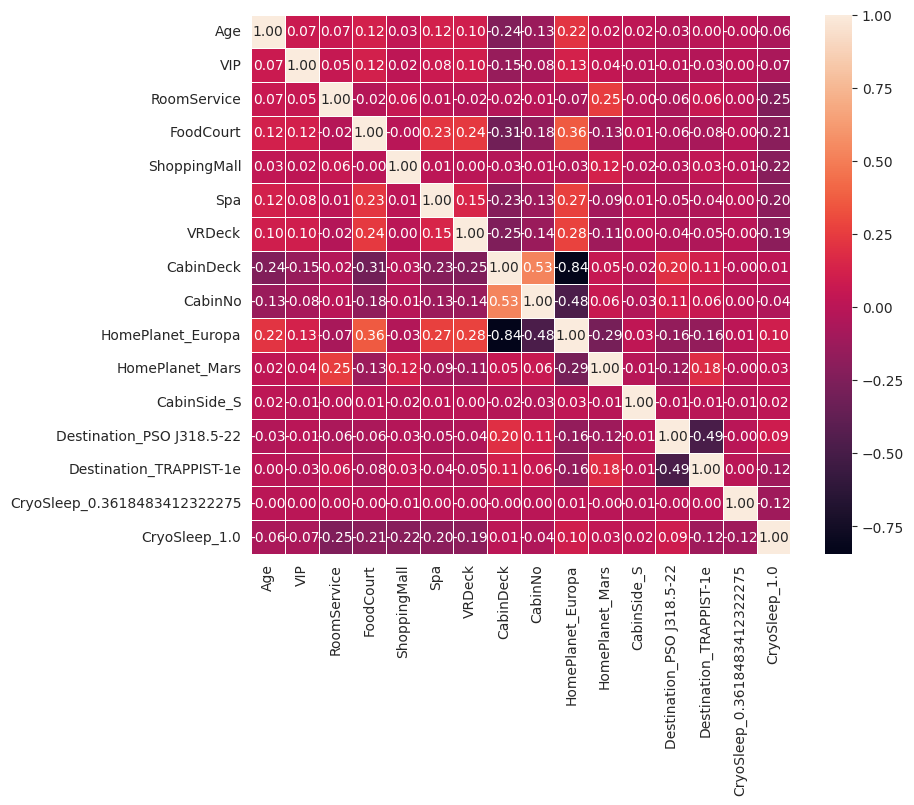

In [109]:
corr = df_CM.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=.5, square=True)
plt.show()

# Preparing Train and Test dataset

In [110]:
train = df_model.iloc[:8693]
train.shape

(8693, 17)

In [111]:
X = train.drop(['Transported'], axis=1)
y = train.Transported

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [113]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.transform(X_test)

In [114]:
# Select categorical predictors
cat_features = df_model.select_dtypes(include='object').columns.to_list()

In [115]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           12970 non-null  float64
 1   VIP                           12970 non-null  int64  
 2   RoomService                   12970 non-null  float64
 3   FoodCourt                     12970 non-null  float64
 4   ShoppingMall                  12970 non-null  float64
 5   Spa                           12970 non-null  float64
 6   VRDeck                        12970 non-null  float64
 7   Transported                   12970 non-null  int64  
 8   CabinDeck                     12970 non-null  int64  
 9   CabinNo                       12970 non-null  float64
 10  HomePlanet_Europa             12970 non-null  float64
 11  HomePlanet_Mars               12970 non-null  float64
 12  CabinSide_S                   12970 non-null  float64
 13  D

# Modelling - all algos together

In [116]:
# !pip install xgboost

In [117]:
# !pip install lightgbm

In [118]:
# !pip install catboost

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

model = [
    DecisionTreeClassifier(max_depth=3, criterion='entropy'),
    RandomForestClassifier(n_estimators=3, criterion='entropy'),
    AdaBoostClassifier(),      #   (n_estimators=3)
    GradientBoostingClassifier(n_estimators=3, max_depth=3),
    XGBClassifier(),     #   (n_estimators=3, max_depth=3)
    CatBoostClassifier(silent=True)      # (depth=6, silent=True)
]

In [120]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

#Do some preperation for the loop
col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
for a in model:

    a.fit(X_train, y_train)
    pred = a.predict(X_test)
    acc_train = accuracy_score(y_train, a.predict(X_train))
    acc_test = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    cv = cross_val_score(a, X_test, y_test).mean()
    auc = roc_auc_score(y_test, pred)

    Alg = a.__class__.__name__

    algorithms.loc[idx, 'Algorithm'] = Alg
    algorithms.loc[idx, 'Accuracy [train]'] = round(acc_train * 100, 2)
    algorithms.loc[idx, 'Accuracy [test]'] = round(acc_test * 100, 2)
    algorithms.loc[idx, 'F1 Score'] = round(f1 * 100, 2)
    algorithms.loc[idx, 'CV Score'] = round(cv * 100, 2)
    algorithms.loc[idx, 'AUC Score'] = round(auc * 100, 2)

    idx+=1

In [121]:
algorithms.sort_values(by='AUC Score', ascending=False)

,Algorithm,Accuracy [train],Accuracy [test],F1 Score,CV Score,AUC Score
5,CatBoostClassifier,87.59,81.60,81.84,79.36,81.59
4,XGBClassifier,92.75,81.43,81.49,78.84,81.43
2,AdaBoostClassifier,79.98,79.47,79.93,78.09,79.46
1,RandomForestClassifier,95.56,76.83,76.93,75.22,76.83
3,GradientBoostingClassifier,75.93,74.70,72.84,75.62,74.75
0,DecisionTreeClassifier,71.96,71.31,66.22,69.18,71.42


# Hyper-parameter tunning

In [122]:
#Catboost

In [123]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            'iterations':[100,500,1000],
            'learning_rate':[0.01,0.1,0.5],
            'depth':[3,6,10]
            }

In [ ]:
grid = GridSearchCV(estimator=CatBoostClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), verbose=False)

In [ ]:
grid.best_params_

In [ ]:
#{'depth': 3, 'iterations': 500, 'learning_rate': 0.1}

In [ ]:
grid.best_score_

In [ ]:
#AdaBoostClassifier

In [ ]:
param_grid = {
            'n_estimators':[10, 100, 1000],
            'learning_rate':[0.01, 0.1, 1.0]
            }

In [ ]:
grid = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
#GradientBoostingClassifier

In [ ]:
param_grid = {
            'n_estimators':[10, 100, 1000],
            'max_depth':[2, 6, 8, 10, 12, 20]
            }

In [ ]:
grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_